<a href="https://colab.research.google.com/github/Salah0Uddin/Machine-Learning-Full/blob/main/ML_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K means Clustering

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [4]:
X.shape

(1000, 2)

In [7]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

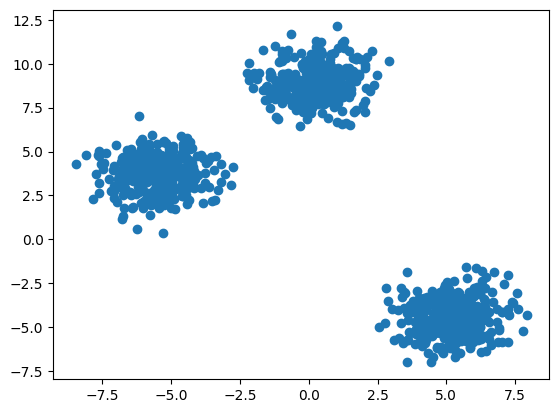

In [8]:
plt.scatter(X[:,0],X[:,1])


In [9]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0000000000002,
 328.2846163280812,
 53.10177342014018,
 45.83703636495695,
 42.49860682988727,
 37.06186050409006,
 29.380842857497875,
 26.577407275311,
 24.719361982053538,
 21.9087379254002]

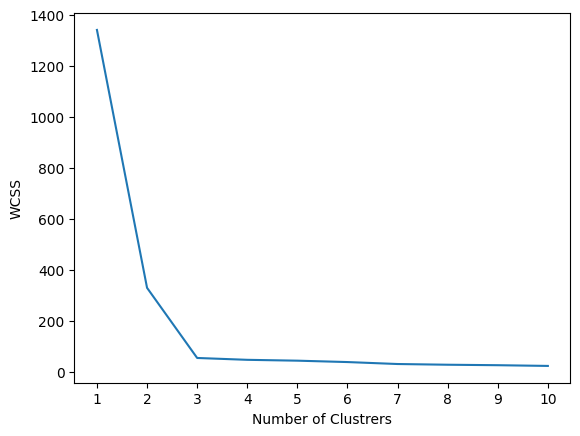

In [14]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,init="k-means++")
kmeans.fit_predict(X_train_scaled)

array([1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 0,
       0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       2, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2,
       0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 1, 1, 1, 1, 0, 1,
       1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2,

In [16]:
y_pred=kmeans.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 1,
       1, 0, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 2, 0,
       0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 0, 0, 1, 0, 1, 2, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0,
       0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0,

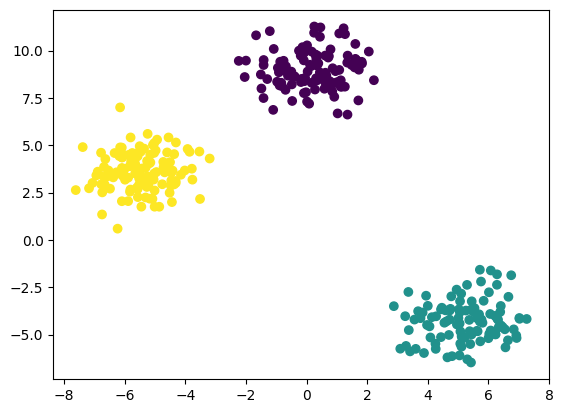

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)


**The above you see is elbow method to find the value of k but if the data is huge this this method is not recommended since it takes much more time**

In [18]:
## Validating the k value
## kneelocator
## Silhoutee scoring
## kneelocator
!pip install kneed

In [19]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [21]:
kl.elbow

np.int64(3)

In [22]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [23]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [24]:
silhouette_coefficients


[np.float64(0.717585639949518),
 np.float64(0.8076116080391137),
 np.float64(0.6234420776860495),
 np.float64(0.47987955063968035),
 np.float64(0.3316545994170373),
 np.float64(0.31296638380421715),
 np.float64(0.332406235977923),
 np.float64(0.32068455431828646),
 np.float64(0.3325167231602561)]

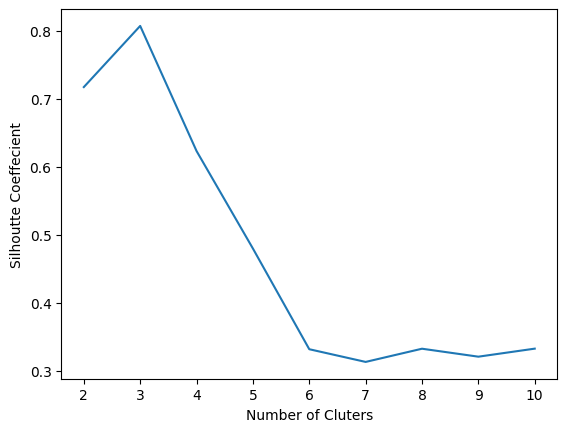

In [25]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()